In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from scipy import stats
import numpy as np
from math import pi
import seaborn as sns

## Cleaning and treating the missing values of the application_data

In [2]:
#reading the file 
df_1 = pd.read_csv('application_data.csv')
#percentage of missing values per column
total_columns = list(df_1.columns)
for columns in total_columns:
    total_null_val_perc = ((df_1[columns].isnull().sum()*100)/len(df_1))
    print (columns,total_null_val_perc)
#removing columns with 50% null values
df_1.dropna(axis = 1,thresh=153756,inplace = True) 
column_list = list(df_1.columns)
#get the type of the columns
for i in column_list:
    print (i, df_1[i].dtypes)
#changing the type of target from int to str as it is a categorical data
df_1['TARGET'] = df_1['TARGET'].apply(str)
# replace some numeric column values with the median-> median: as these col may contain outlier so choosing the median 
#is the better option
col_median = ['AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE']
for c in col_median:
    df_1[c] = df_1[c].fillna(df_1[c].median())

# the following for loop will create subplots for all numerical columns and then we can proceed with their analysis.

for num_col in col_numeric:
    output_file(+num_col+'_app.html')
    p = figure(plot_width=2000, plot_height=500)

    #plot scatter plot to remove outliers for each col
    p.circle(df_1.index, df_1[num_col], size=20, color="navy", alpha=0.5)
    show(p)

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.000650383238323182
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.3810725

In [3]:
df_1.shape

(307511, 81)

## Removing outliers
#### The section to remove outliers from the top 1% of the data.

In [4]:
col_outliers = ['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE']

# This function checks whether the values fall between 0-99% and if yes then they are saved 
#and if not then those particular rows are deleted.
def cap_data(df_1):
    for col in col_outliers:
        #print("capping the ",col)
        if (((df_1[col].dtype)=='float64') | ((df_1[col].dtype)=='int64')):
            percentiles = df_1[col].quantile([0.00,.99]).values
            indexNames = df_1[col][df_1[col] >= percentiles[1]].index
            df_1.drop(indexNames , inplace=True)
            #print(indexNames)
        else:
            df_1[col]=df_1[col]
    return df_1

df_without_outliers=cap_data(df_1)

In [5]:
df_without_outliers.shape

(293773, 81)

## Cleaning and treating the missing values of the previous_application

In [6]:
df_prev = pd.read_csv('previous_application.csv')
#percentage of missing values per column
total_columns = list(df_prev.columns)
for columns in total_columns:
    total_null_val_perc = ((df_prev[columns].isnull().sum()*100)/len(df_prev))
    print (columns,total_null_val_perc)
#removing columns with 50% null values
df_prev.dropna(axis = 1,thresh=(len(df_prev)/2),inplace = True)
column_list = list(df_prev.columns)
#print datatype of each column
for i in column_list:
    print (i, df_prev[i].dtypes)
#change the datatype of SK_ID_CURR from int to str
df_prev['SK_ID_CURR'] = df_prev['SK_ID_CURR'].apply(str)
print (df_prev.SK_ID_CURR.dtype)
#replace null values in numeric col with median as these columns may contain outliers, so taking average in missing cells 
#will change the results.
col_numeric2 = list(df_prev.columns[(df_prev.dtypes == int) | (df_prev.dtypes == float)])
for c in col_numeric2:
    df_prev[c] = df_prev[c].fillna(df_prev[c].median())

# the following for loop will create subplots for all numerical columns for previous application and then we can proceed with their analysis.
    
for num_col in col_numeric2:
    output_file(+num_col+'prev_app.html')
    p2 = figure(plot_width=2000, plot_height=500)
    p2.left[0].formatter.use_scientific = False

    #plot scatter plot to remove outliers for each col
    
    p2.circle(df_prev.index, df_prev[num_col], size=20, color="navy", alpha=0.5)
    show(p2)

SK_ID_PREV 0.0
SK_ID_CURR 0.0
NAME_CONTRACT_TYPE 0.0
AMT_ANNUITY 22.286665062081866
AMT_APPLICATION 0.0
AMT_CREDIT 5.9872567227912114e-05
AMT_DOWN_PAYMENT 53.636480115721696
AMT_GOODS_PRICE 23.08177275486854
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
FLAG_LAST_APPL_PER_CONTRACT 0.0
NFLAG_LAST_APPL_IN_DAY 0.0
RATE_DOWN_PAYMENT 53.636480115721696
RATE_INTEREST_PRIMARY 99.6436983524267
RATE_INTEREST_PRIVILEGED 99.6436983524267
NAME_CASH_LOAN_PURPOSE 0.0
NAME_CONTRACT_STATUS 0.0
DAYS_DECISION 0.0
NAME_PAYMENT_TYPE 0.0
CODE_REJECT_REASON 0.0
NAME_TYPE_SUITE 49.11975351661523
NAME_CLIENT_TYPE 0.0
NAME_GOODS_CATEGORY 0.0
NAME_PORTFOLIO 0.0
NAME_PRODUCT_TYPE 0.0
CHANNEL_TYPE 0.0
SELLERPLACE_AREA 0.0
NAME_SELLER_INDUSTRY 0.0
CNT_PAYMENT 22.286365699245724
NAME_YIELD_GROUP 0.0
PRODUCT_COMBINATION 0.02071590826085759
DAYS_FIRST_DRAWING 40.29812946125467
DAYS_FIRST_DUE 40.29812946125467
DAYS_LAST_DUE_1ST_VERSION 40.29812946125467
DAYS_LAST_DUE 40.29812946125467
DAYS_TERMINATION 40.

In [7]:
df_prev.shape

(1670214, 33)

## Removing outliers

In [8]:
col_outliers3 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']

# This function checks whether the values fall between 0-99% and if yes then they are saved 
#and if not then those particular rows are deleted.
def cap_data_prev(df_prev):
    for col in col_outliers3:
        #print("capping the ",col)
        if (((df_prev[col].dtype)=='float64') | ((df_prev[col].dtype)=='int64')):
            percentiles = df_prev[col].quantile([0.00,1.00]).values
            indexNames = df_prev[col][df_prev[col] >= percentiles[1]].index
            df_prev.drop(indexNames , inplace=True)
            #print(indexNames)
        else:
            df_prev[col]=df_prev[col]
    return df_prev

prev_df_without_outliers=cap_data_prev(df_prev)

In [9]:
prev_df_without_outliers.shape

(1670209, 33)

## Divide the data on the basis of columns

### Divide the df_1(filtered application_data) will be divided on the basis of target value i.e., 0 and 1

In [10]:
df_Target_1 = df_1[df_1.TARGET == '1']
df_Target_0 = df_1[df_1.TARGET == '0']

### Divide the df_prev(filtered previous_application_data) will be divided on the basis of NAME_CONTRACT_STATUS i.e., Approved and Refused

In [11]:
df_prev_appr = df_prev[df_prev.NAME_CONTRACT_STATUS == 'Approved']
df_prev_ref = df_prev[df_prev.NAME_CONTRACT_STATUS == 'Refused']

## Univariate analysis for categorical data

In [12]:
#plot all the categorical data together for univariate analysis

def univariate_graph(df_1,name):
    a={}
    column_list = list(df_1.columns)
    #remove the target and new_contract_status from the list if present
    if 'TARGET' in column_list:
        column_list.remove('TARGET')
    if 'NAME_CONTRACT_STATUS' in column_list:
        column_list.remove('NAME_CONTRACT_STATUS')
    for col in column_list:
        if df_1[col].dtypes == 'object':
            #calculate the percentage of each val in the col
            result=(df_1[col].value_counts())*100/len(df_1)
            a.update(result)
            output_file(+col+'_'+name+'.html')
            x = list(a.keys())
            y = list(a.values())
            p = figure(x_range=x, plot_height=1000,plot_width = 2000, title=col+'_'+name,toolbar_location=None, tools="")
            p.left[0].formatter.use_scientific = False
            p.vbar(x=x, top=y, width=0.9)
            p.xaxis.major_label_orientation = pi/4
            p.xgrid.grid_line_color = None
            p.y_range.start = 0
            show(p)
            a.clear()
#for target_1            


### Univariate analysis of application data where target value =1

In [13]:
df = univariate_graph(df_Target_1,'target_1')

### Univariate analysis of application data where target value =0

In [29]:
df = univariate_graph(df_Target_0,'target_0')

### Univariate analysis of previous application data where NAME_CONTRACT_STATUS = Approved

In [14]:
df = univariate_graph(df_prev_appr,'approved')

### Univariate analysis of previous application data where NAME_CONTRACT_STATUS = Refused

In [15]:
df = univariate_graph(df_prev_ref,'refused')

## Bivariate analysis for numeric columns

In [16]:
# bivariate analysis where we study the correlation of the numeric columns
def bivariate_graph(df_1,name):
    new_df = pd.DataFrame()
    column_list = list(df_1.columns)
    #remove the SK_ID_CURR, SK_ID_PREV if present 
    if 'SK_ID_CURR' in column_list:
        column_list.remove('SK_ID_CURR')
    if 'SK_ID_PREV' in column_list:
        column_list.remove('SK_ID_PREV')
    for col in column_list:
        if df_1[col].dtypes != 'object':
            result = df_1[col]
            new_df=new_df.append(result)
    new_df = new_df.transpose()
    correlation_matrix=new_df.corr()
    plt.figure(figsize=(20,15))
    sns.heatmap(correlation_matrix,cmap="BuPu")
    plt.show()


### Bivariate analysis of application data where target value =0

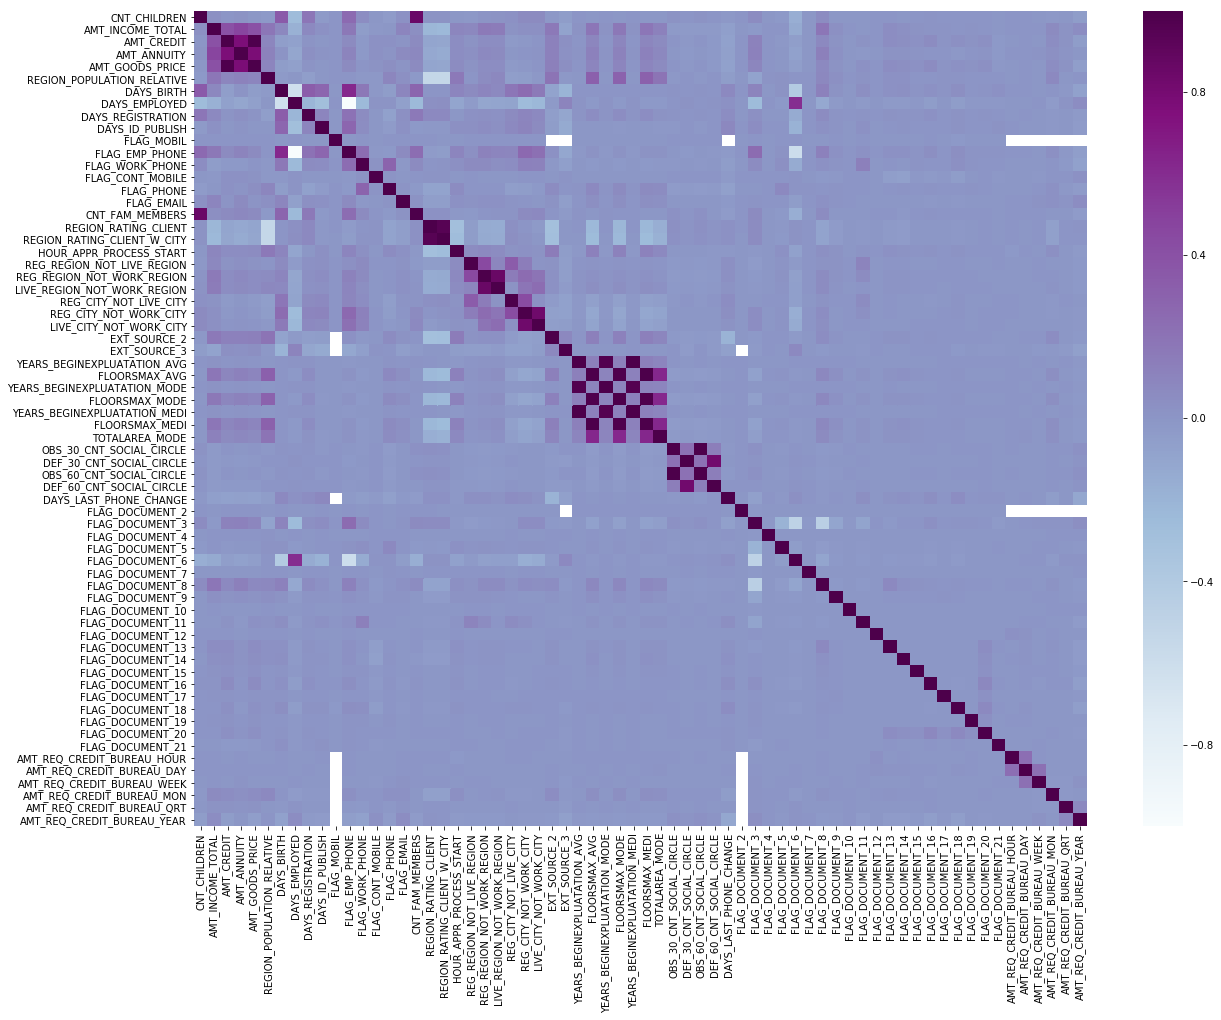

In [17]:
df = bivariate_graph(df_Target_0,'target_0')

### Bivariate analysis of application data where target value =1

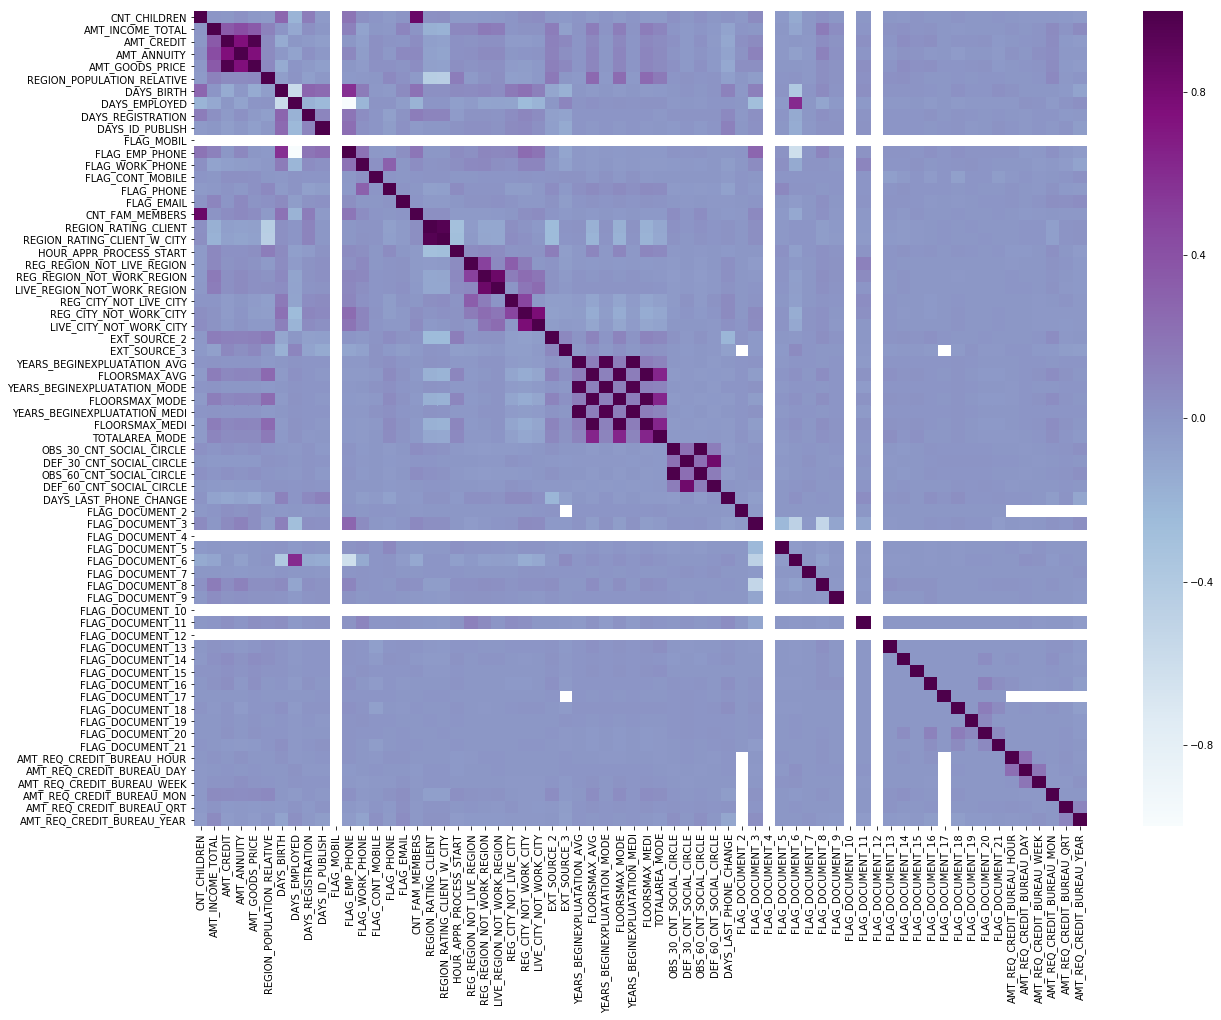

In [18]:
df = bivariate_graph(df_Target_1,'target_1')

### Bivariate analysis of previous application data where NAME_CONTRACT_STATUS = Approved

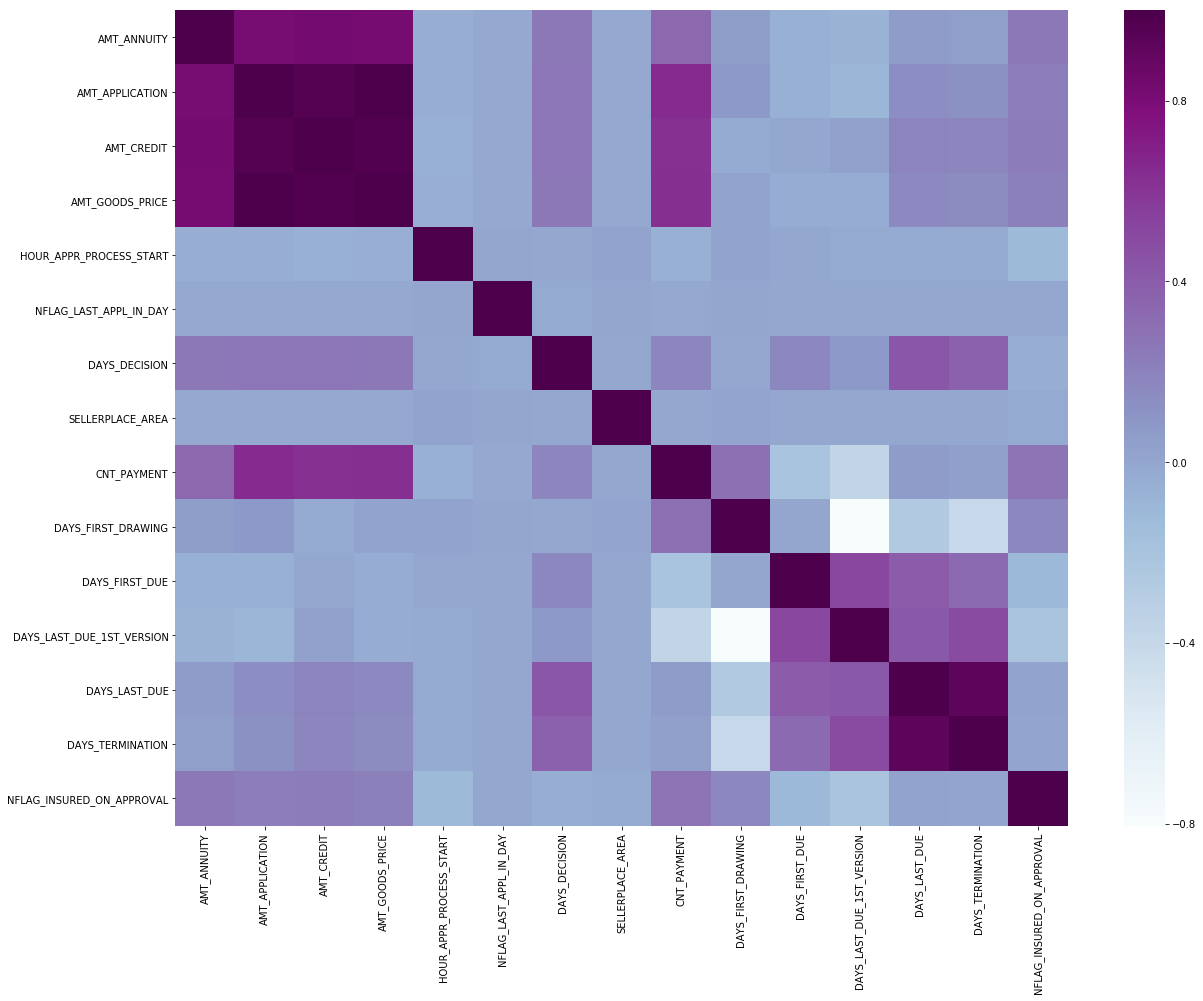

In [19]:
df = bivariate_graph(df_prev_appr,'approved')

### Bivariate analysis of previous application data where NAME_CONTRACT_STATUS = Refused

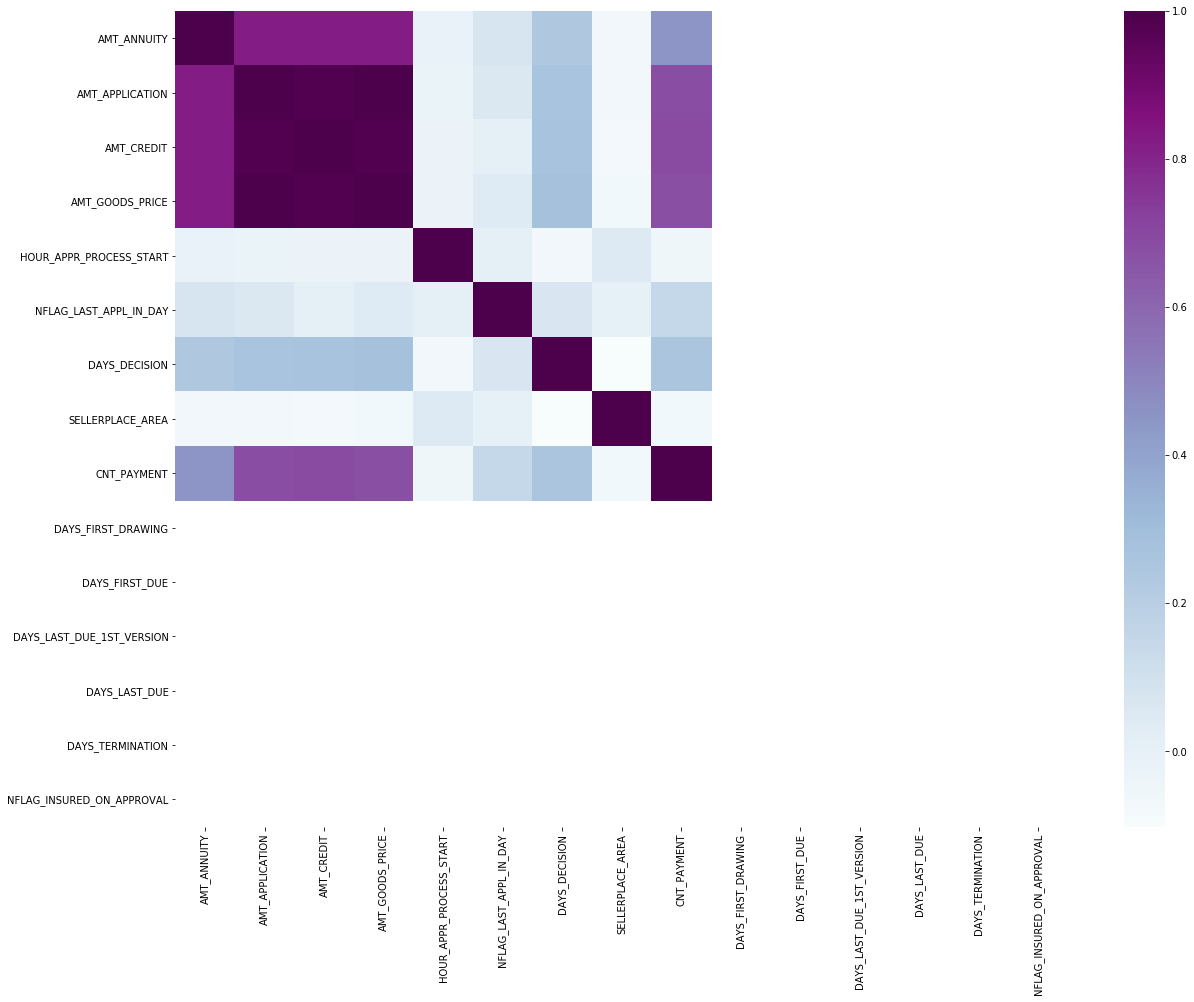

In [20]:
df = bivariate_graph(df_prev_ref,'refused')